# GenAI Advisor Evaluation Notebook
This notebook analyses batch backtesting results systematically, generating clear metrics and plots for your dissertation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Load the batch backtest CSV
eval_dir = Path('evaluation')
file_path = eval_dir / 'batch_backtest_20250706_070240.csv'
df = pd.read_csv(file_path)

print(f"Loaded {file_path} with {len(df)} records.")
df.head()

Loaded evaluation/batch_backtest_20250706_070240.csv with 12 records.


,ticker,as_of_date,recommendation,reason,price_change_%
0,MSFT,2025-04-01,BUY,1 out of 3 signals indicate BUY.,11.32
1,MSFT,2025-05-01,BUY,1 out of 3 signals indicate BUY.,5.76
2,MSFT,2025-06-01,HOLD,No signals strongly indicate a buy condition.,6.51
3,AAPL,2025-04-01,BUY,1 out of 3 signals indicate BUY.,-4.72
4,AAPL,2025-05-01,BUY,1 out of 3 signals indicate BUY.,-2.19


In [2]:
# Basic dataset stats
print(df.describe())
print(df['recommendation'].value_counts())

       price_change_%
count       12.000000
mean         3.565000
std          4.758456
min         -4.720000
25%          1.485000
50%          4.365000
75%          6.552500
max         11.320000
recommendation
BUY     8
HOLD    4
Name: count, dtype: int64


## Price Change % Distribution After Recommendations

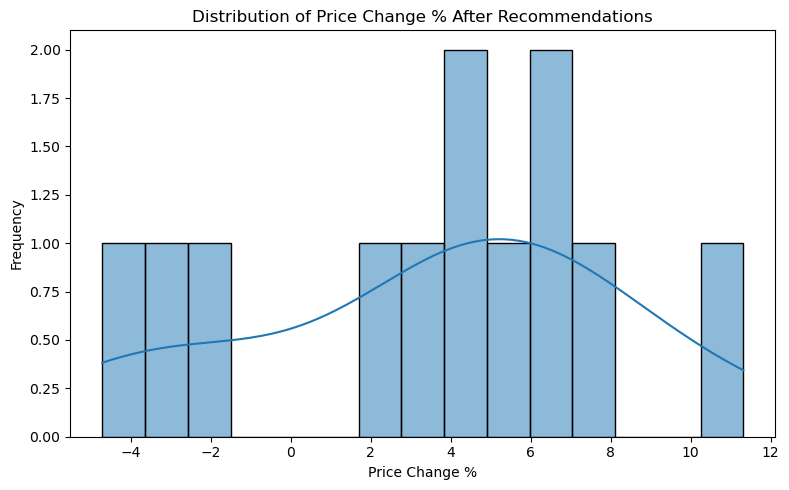

In [3]:
plt.figure(figsize=(8,5))
sns.histplot(df['price_change_%'].dropna(), bins=15, kde=True)
plt.title('Distribution of Price Change % After Recommendations')
plt.xlabel('Price Change %')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Price Change % by Recommendation Type

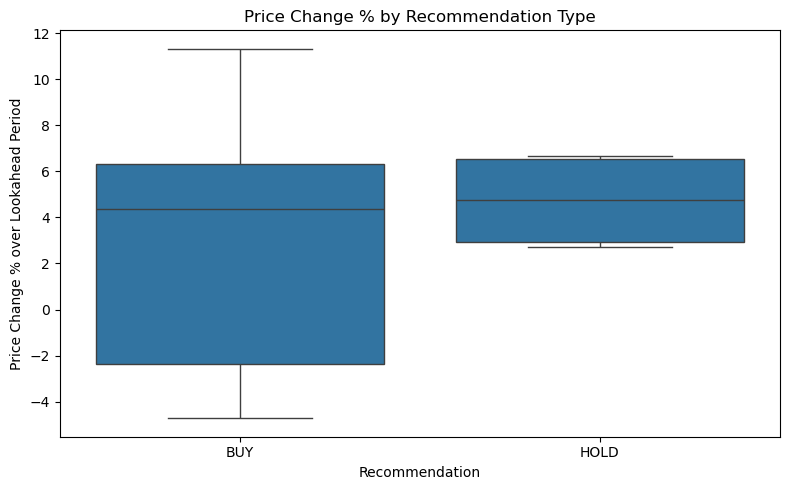

In [4]:
plt.figure(figsize=(8,5))
sns.boxplot(x='recommendation', y='price_change_%', data=df)
plt.title('Price Change % by Recommendation Type')
plt.ylabel('Price Change % over Lookahead Period')
plt.xlabel('Recommendation')
plt.tight_layout()
plt.show()

## BUY Signal Effectiveness

In [5]:
buy_signals = df[df['recommendation'] == 'BUY']
buy_positive = buy_signals[buy_signals['price_change_%'] > 0]

if len(buy_signals) > 0:
    buy_accuracy = len(buy_positive) / len(buy_signals) * 100
    print(f"BUY signal accuracy: {buy_accuracy:.2f}% ({len(buy_positive)}/{len(buy_signals)})")
else:
    print("No BUY signals to evaluate.")

BUY signal accuracy: 62.50% (5/8)


In [6]:
df.to_csv(eval_dir / 'processed_evaluation_summary.csv', index=False)
print(f"Processed evaluation summary saved to {eval_dir / 'processed_evaluation_summary.csv'}")

Processed evaluation summary saved to evaluation/processed_evaluation_summary.csv
